# Imports

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

# Loading dataset 

In [4]:
top100_df= pd.read_csv('/Users/david/code/dmassonfr/Spotify_hit_predictor/notebooks/top100_df.csv')
top100_df

,Unnamed: 0,track_id,track_name,popularity,duration_ms,explicit,artist_name,artist_id,release_date,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,preview_url,cover_url
0,0,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,89,200040,False,The Weeknd,1Xyo4u8uXC1ZmMpatF05PJ,2020-03-20,0.514,...,-5.934,1,0.0598,0.001460,0.000095,0.0897,0.334,171.005,### no audio preview available ###,https://i.scdn.co/image/ab67616d0000b2738863bc...
1,1,7qiZfU4dY1lWllzX7mPBI3,Shape of You,85,233712,False,Ed Sheeran,6eUKZXaKkcviH0Ku9w2n3V,2017-03-03,0.825,...,-3.183,0,0.0802,0.581000,0.000000,0.0931,0.931,95.977,https://p.scdn.co/mp3-preview/7339548839a263fd...,https://i.scdn.co/image/ab67616d0000b273ba5db4...
2,2,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,76,209438,False,Tones And I,2NjfBq1NflQcKSeiDooVjY,2019-10-17,0.824,...,-6.400,0,0.0924,0.692000,0.000104,0.1490,0.513,98.027,https://p.scdn.co/mp3-preview/d03d7e46e89547f5...,https://i.scdn.co/image/ab67616d0000b273c6f7af...
3,3,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,86,182160,False,Lewis Capaldi,4GNC7GD6oZMSxPGyXy4MNB,2019-05-17,0.501,...,-5.679,1,0.0319,0.751000,0.000000,0.1050,0.446,109.891,### no audio preview available ###,https://i.scdn.co/image/ab67616d0000b273fc2101...
4,4,7wGoVu4Dady5GV0Sv4UIsx,rockstar,0,218320,True,Post Malone,246dkjvS1zLTtiykXe5h60,2017-09-15,0.577,...,-6.594,0,0.0984,0.130000,0.000090,0.1420,0.119,159.772,### no audio preview available ###,https://i.scdn.co/image/ab67616d0000b273345f82...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,7ygpwy2qP3NbrxVkHvUhXY,Wonderwall - Remastered,75,258773,False,Oasis,2DaxqgrOhkeH0fpeiQq2f4,1995,0.375,...,-4.097,1,0.0406,0.000509,0.000000,0.1870,0.434,174.323,https://p.scdn.co/mp3-preview/a983b69e865235e4...,https://i.scdn.co/image/ab67616d0000b2737a4c8c...
96,96,68Dni7IE4VyPkTOH9mRWHr,No Role Modelz,87,292799,True,J. Cole,6l3HvQ5sa6mXTsMTB19rO5,2014-12-09,0.690,...,-8.492,0,0.3390,0.324000,0.000000,0.0534,0.494,100.028,### no audio preview available ###,https://i.scdn.co/image/ab67616d0000b273c6e094...
97,97,0KKkJNfGyhkQ5aFogxQAPU,That's What I Like,82,206693,False,Bruno Mars,0du5cEVh5yTK9QJze8zA0C,2016-11-17,0.853,...,-4.961,1,0.0406,0.013000,0.000000,0.0944,0.860,134.066,https://p.scdn.co/mp3-preview/93046e987d8c5bfd...,https://i.scdn.co/image/ab67616d0000b273232711...
98,98,0nbXyq5TXYPCO7pr3N8S4I,The Box,80,196652,True,Roddy Ricch,757aE44tKEUQEqRuT6GnEB,2019-12-06,0.896,...,-6.687,0,0.0559,0.104000,0.000000,0.7900,0.642,116.971,https://p.scdn.co/mp3-preview/6306fda4df77cbca...,https://i.scdn.co/image/ab67616d0000b273600adb...


In [23]:
#Cut the brackets around numerical data
top100_df['artist_id'] = [i[2:-2] for i in top100_df['artist_id']]
top100_df['release_year'] = [int(i.split('-')[0]) for i in top100_df['release_date']]

In [24]:
top100_df_clean= top100_df.drop(['Unnamed: 0', 'preview_url', 'cover_url'], axis=1)
top100_df_clean

,track_id,track_name,popularity,duration_ms,explicit,artist_name,artist_id,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,release_year
0,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,89,200040,False,The Weeknd,yo4u8uXC1ZmMpatF05,2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.001460,0.000095,0.0897,0.334,171.005,2020
1,7qiZfU4dY1lWllzX7mPBI3,Shape of You,85,233712,False,Ed Sheeran,UKZXaKkcviH0Ku9w2n,2017-03-03,0.825,0.652,1,-3.183,0,0.0802,0.581000,0.000000,0.0931,0.931,95.977,2017
2,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,76,209438,False,Tones And I,jfBq1NflQcKSeiDooV,2019-10-17,0.824,0.588,6,-6.400,0,0.0924,0.692000,0.000104,0.1490,0.513,98.027,2019
3,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,86,182160,False,Lewis Capaldi,NC7GD6oZMSxPGyXy4M,2019-05-17,0.501,0.405,1,-5.679,1,0.0319,0.751000,0.000000,0.1050,0.446,109.891,2019
4,7wGoVu4Dady5GV0Sv4UIsx,rockstar,0,218320,True,Post Malone,6dkjvS1zLTtiykXe5h,2017-09-15,0.577,0.522,5,-6.594,0,0.0984,0.130000,0.000090,0.1420,0.119,159.772,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7ygpwy2qP3NbrxVkHvUhXY,Wonderwall - Remastered,75,258773,False,Oasis,axqgrOhkeH0fpeiQq2,1995,0.375,0.893,2,-4.097,1,0.0406,0.000509,0.000000,0.1870,0.434,174.323,1995
96,68Dni7IE4VyPkTOH9mRWHr,No Role Modelz,87,292799,True,J. Cole,3HvQ5sa6mXTsMTB19r,2014-12-09,0.690,0.521,10,-8.492,0,0.3390,0.324000,0.000000,0.0534,0.494,100.028,2014
97,0KKkJNfGyhkQ5aFogxQAPU,That's What I Like,82,206693,False,Bruno Mars,u5cEVh5yTK9QJze8zA,2016-11-17,0.853,0.560,1,-4.961,1,0.0406,0.013000,0.000000,0.0944,0.860,134.066,2016
98,0nbXyq5TXYPCO7pr3N8S4I,The Box,80,196652,True,Roddy Ricch,7aE44tKEUQEqRuT6Gn,2019-12-06,0.896,0.586,10,-6.687,0,0.0559,0.104000,0.000000,0.7900,0.642,116.971,2019


In [25]:
top100_df_clean.isnull().sum()

track_id            0
track_name          0
popularity          0
duration_ms         0
explicit            0
artist_name         0
artist_id           0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
release_year        0
dtype: int64

In [26]:
corr = top100_df_clean.corr()
corr

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,release_year
popularity,1.000000,0.121257,-0.007077,0.119973,-0.151779,0.149363,-0.003437,0.086000,-0.143672,0.187335,-0.094513,-0.223282,0.073184,-0.011959,-0.009834
duration_ms,0.121257,1.000000,-0.056647,-0.220909,0.004715,-0.094496,0.052846,0.219878,-0.006847,-0.011603,0.041178,-0.161858,-0.255994,-0.060447,-0.549404
explicit,-0.007077,-0.056647,1.000000,0.219613,-0.013833,0.090001,-0.133424,-0.041005,0.256294,-0.157309,-0.113541,0.133968,-0.080993,0.221038,0.152295
danceability,0.119973,-0.220909,0.219613,1.000000,-0.036230,0.173995,-0.029487,-0.209315,0.131763,-0.155700,-0.084468,0.000345,0.450471,-0.110195,0.388358
energy,-0.151779,0.004715,-0.013833,-0.036230,1.000000,-0.007309,0.677441,-0.068598,-0.037158,-0.712674,0.120404,0.044346,0.255211,0.294952,-0.043694
key,0.149363,-0.094496,0.090001,0.173995,-0.007309,1.000000,-0.074132,-0.191809,0.153886,-0.001489,-0.050705,0.053524,0.136296,-0.112898,0.288818
loudness,-0.003437,0.052846,-0.133424,-0.029487,0.677441,-0.074132,1.000000,0.106397,-0.329993,-0.393702,-0.047026,-0.052041,0.227115,0.188642,-0.078784
mode,0.086000,0.219878,-0.041005,-0.209315,-0.068598,-0.191809,0.106397,1.000000,-0.180459,0.122540,-0.052360,-0.151187,-0.147444,-0.021167,-0.072002
speechiness,-0.143672,-0.006847,0.256294,0.131763,-0.037158,0.153886,-0.329993,-0.180459,1.000000,0.018693,-0.024656,0.029923,0.029904,0.135379,0.119727
acousticness,0.187335,-0.011603,-0.157309,-0.155700,-0.712674,-0.001489,-0.393702,0.122540,0.018693,1.000000,-0.118102,-0.180851,-0.139028,-0.257533,0.049150


In [30]:
corr['popularity'][np.absolute(corr['popularity'])>0].sort_values(ascending = False)

popularity          1.000000
acousticness        0.187335
key                 0.149363
duration_ms         0.121257
danceability        0.119973
mode                0.086000
valence             0.073184
loudness           -0.003437
explicit           -0.007077
release_year       -0.009834
tempo              -0.011959
instrumentalness   -0.094513
speechiness        -0.143672
energy             -0.151779
liveness           -0.223282
Name: popularity, dtype: float64

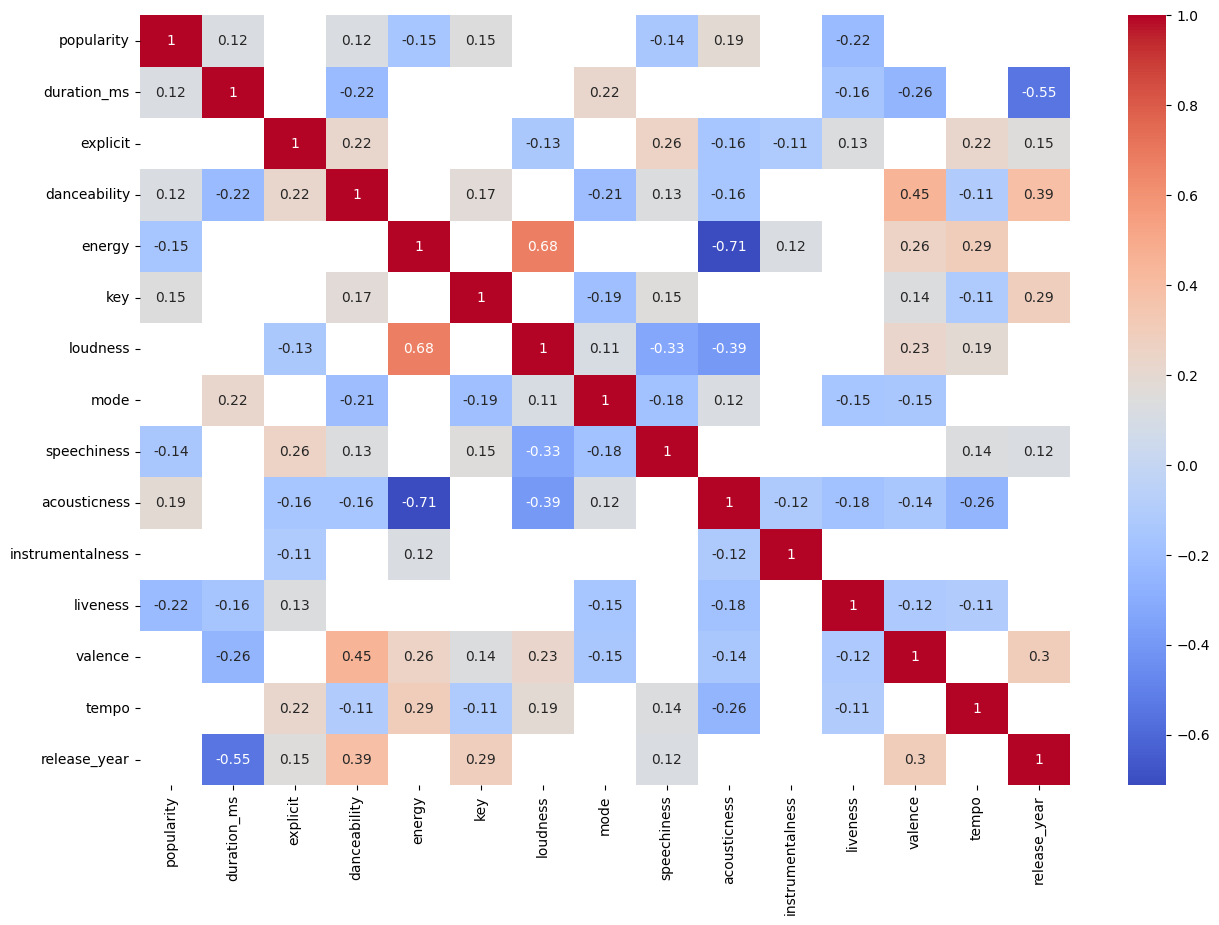

In [31]:
fig, ax = plt.subplots(figsize= (15,10))
sns.heatmap(corr[np.absolute(corr)>0.1], annot = True, cmap='coolwarm')
plt.show()

In [32]:
X = top100_df_clean.drop(['popularity'], axis = 1)
y = top100_df_clean['popularity']

In [33]:
y.describe()

count    100.000000
mean      59.700000
std       33.136845
min        0.000000
25%       38.750000
50%       79.000000
75%       83.000000
max       90.000000
Name: popularity, dtype: float64

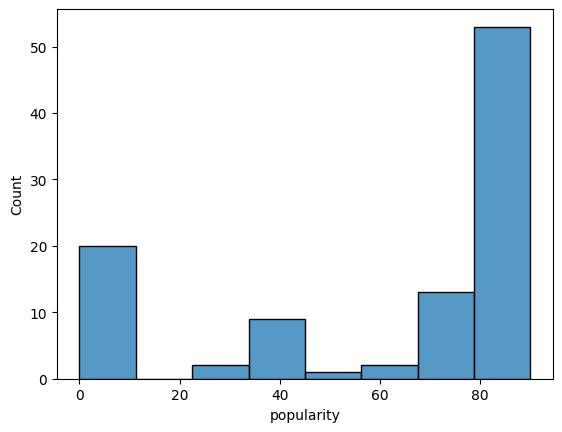

In [34]:
# target distribution
sns.histplot(y)
plt.show()

In [36]:
X.shape

(100, 19)

In [40]:
X.dtypes

track_id             object
track_name           object
duration_ms           int64
explicit               bool
artist_name          object
artist_id            object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
release_year          int64
dtype: object

In [41]:
# drop select columns --> removing all object columns, removing all non-continous
X = X.drop(columns=["track_id", "artist_name", "artist_id", "release_date", "key"], axis=1)
X.dtypes

track_name           object
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
release_year          int64
dtype: object

In [42]:
X.describe()

,duration_ms,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,release_year
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,212794.630000,0.658980,0.628890,-6.211360,0.610000,0.102884,0.237096,0.008693,0.170896,0.504130,121.430720,2016.85000
std,41887.275674,0.145084,0.158989,2.047635,0.490207,0.093908,0.253275,0.052251,0.126855,0.219402,30.705762,5.96687
min,119133.000000,0.327000,0.264000,-11.145000,0.000000,0.023200,0.000243,0.000000,0.034400,0.059000,71.105000,1975.00000
25%,183144.000000,0.557750,0.523750,-7.232750,0.000000,0.042550,0.028900,0.000000,0.094875,0.368750,98.022000,2015.75000
50%,208501.500000,0.688000,0.636000,-5.977500,1.000000,0.059400,0.160000,0.000000,0.116500,0.498500,116.510000,2018.00000
75%,239976.250000,0.762500,0.752500,-4.847250,1.000000,0.120750,0.359000,0.000060,0.184750,0.664250,144.165750,2020.00000
max,354320.000000,0.921000,0.922000,-2.749000,1.000000,0.438000,0.934000,0.465000,0.790000,0.931000,192.050000,2023.00000


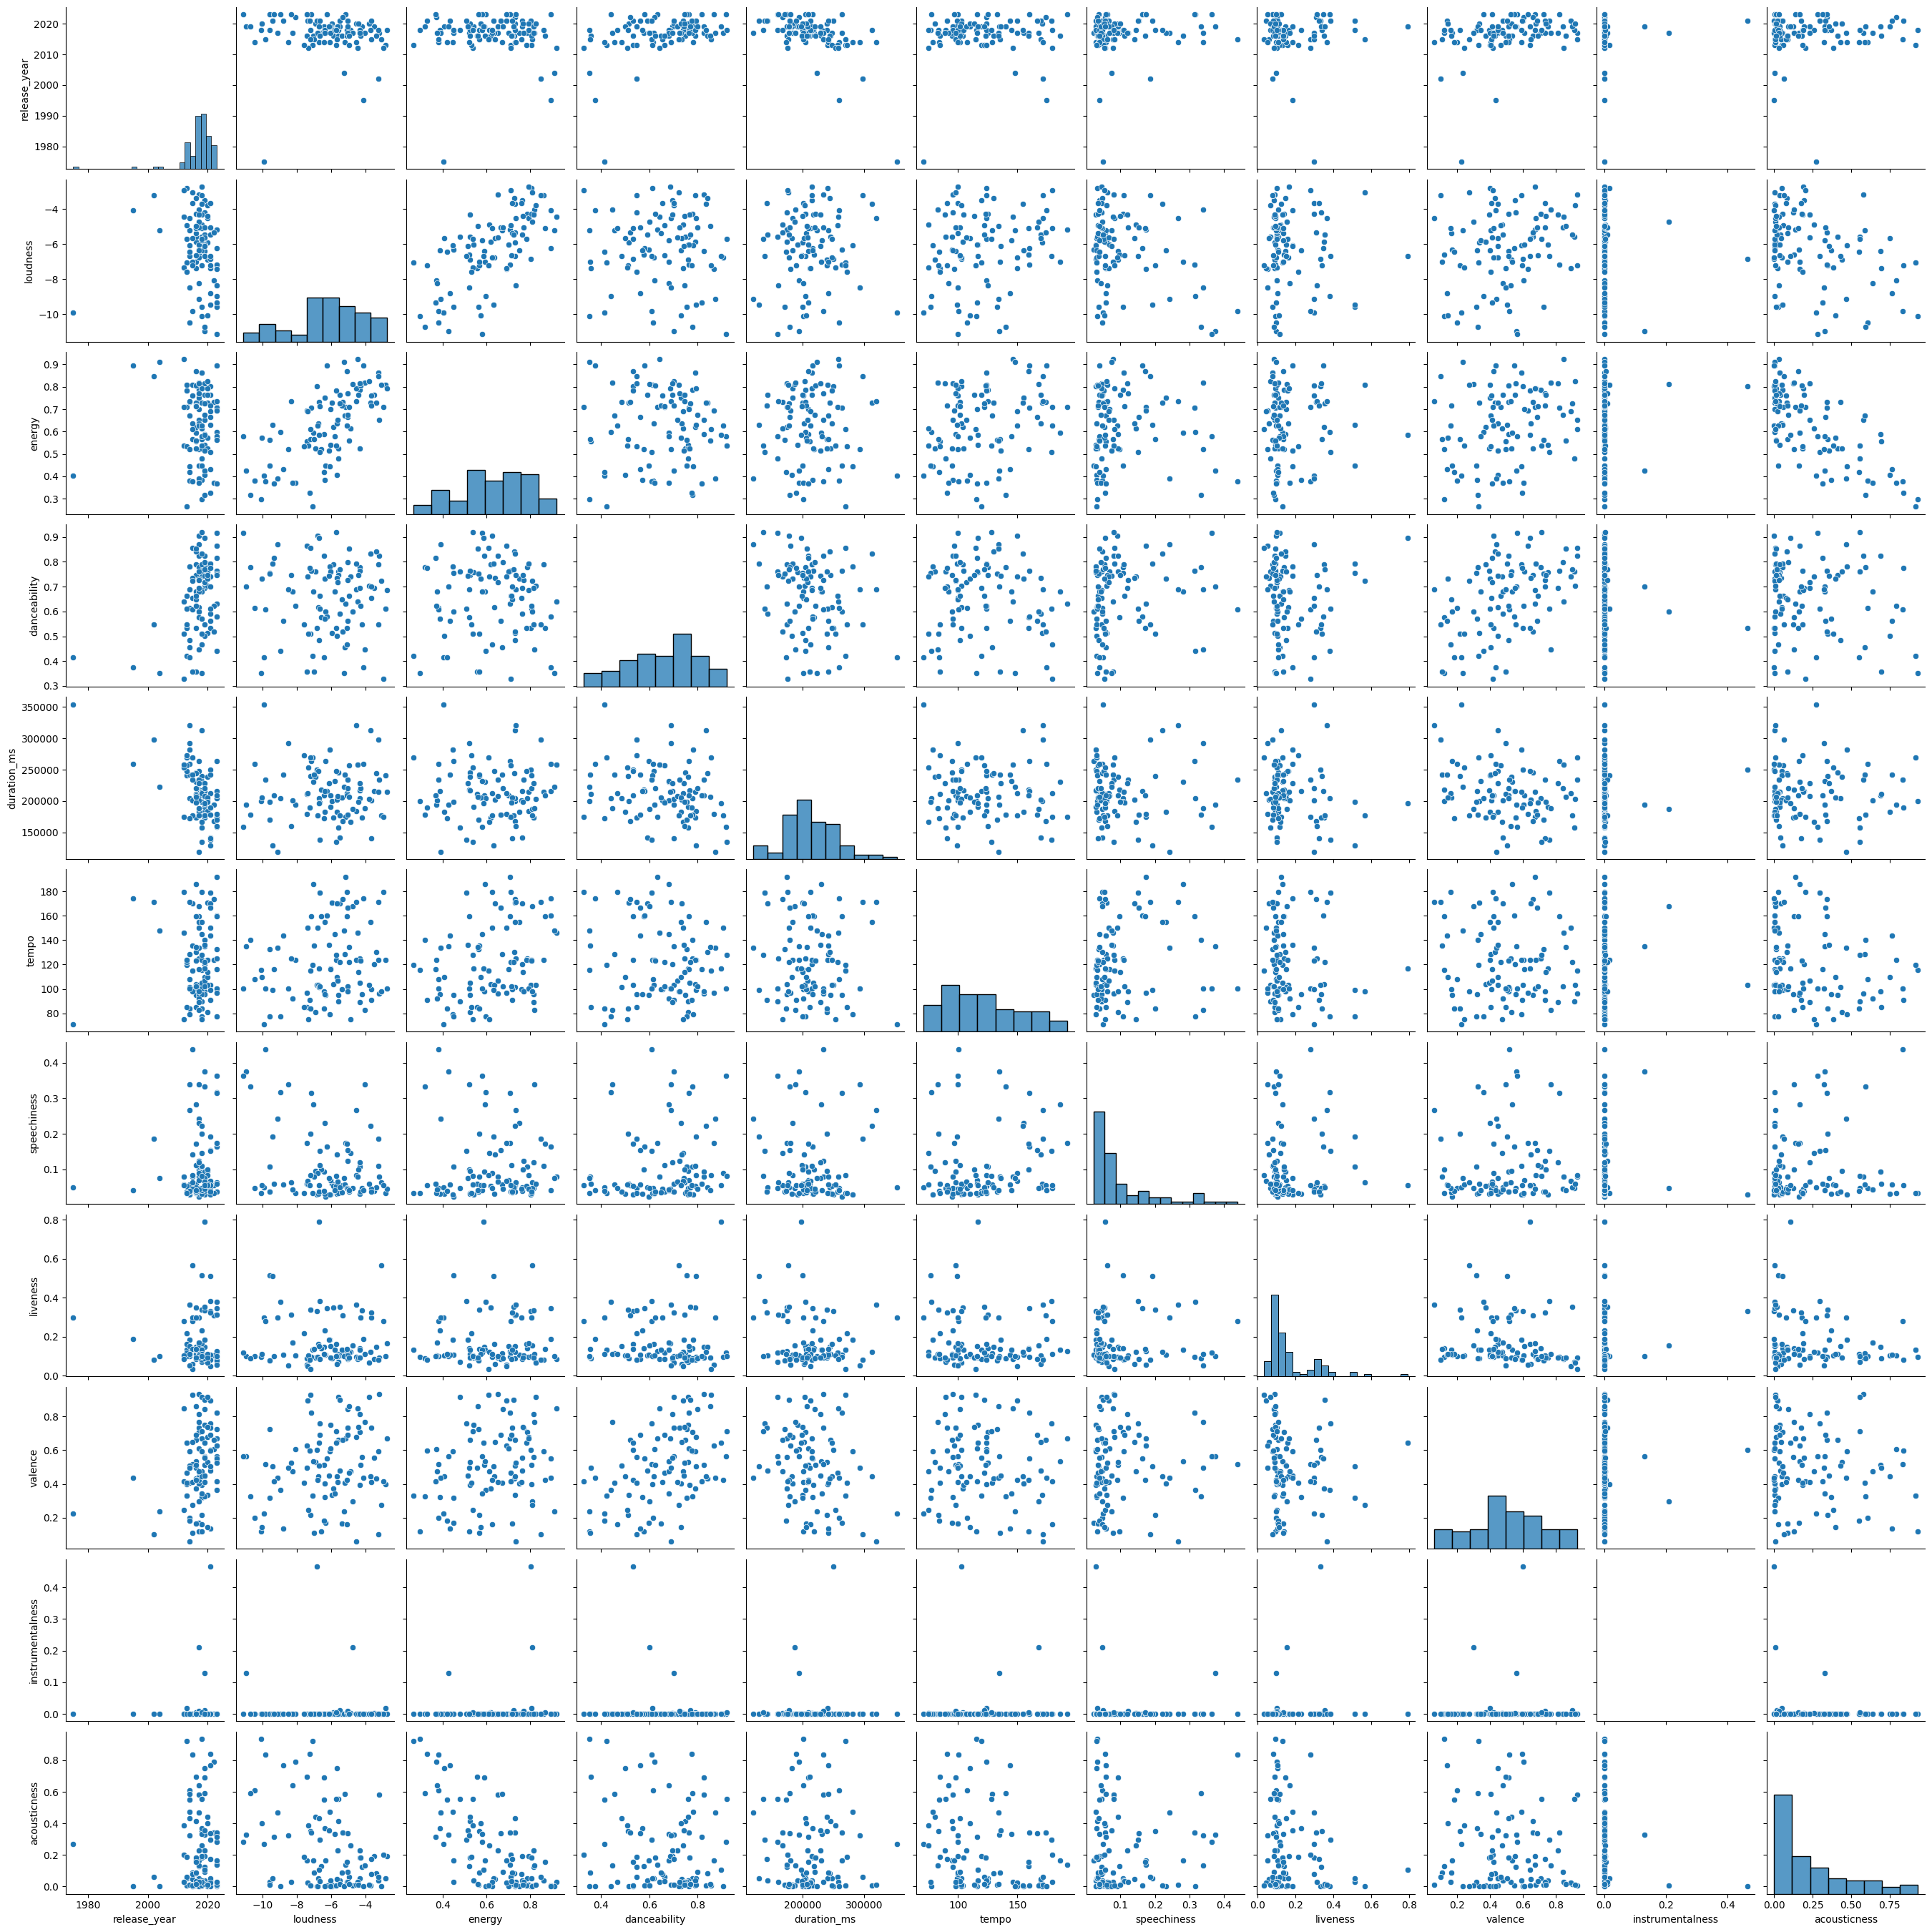

In [43]:
X_select = X[["release_year", "loudness",
             "energy", "danceability", 
             "duration_ms", "tempo", "speechiness",
             "liveness", "valence", "instrumentalness", "acousticness"]]
sns.pairplot(X_select)
plt.show()

# Baseline model

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_select, y, test_size = 0.2, random_state = 0)

In [48]:
dt_reg = DecisionTreeRegressor()

In [49]:
dt_reg.fit(X_train,y_train)

dt_pred = dt_reg.predict(X_test)

In [50]:
rmse_dt = mean_squared_error(y_test, dt_pred,squared=False)
print("Root Mean Squared Error for Decision Tree Regressor:", round(rmse_dt, 3))

Root Mean Squared Error for Decision Tree Regressor: 33.555


In [51]:
print("R2 Score for Decision Tree Regressor:", round(r2_score(y_test, dt_pred), 3))

R2 Score for Decision Tree Regressor: -0.137


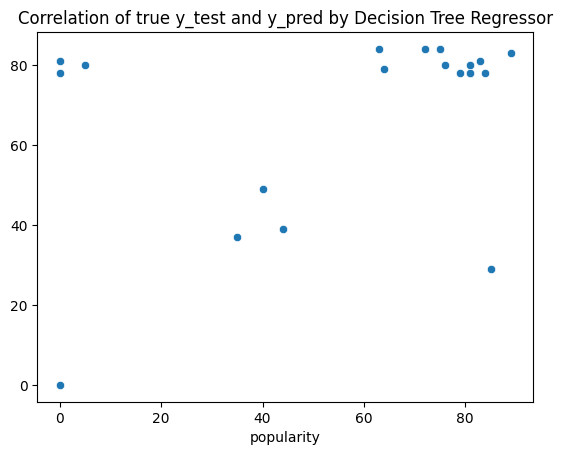

In [52]:
sns.scatterplot(x=y_test, y=dt_pred)
plt.title("Correlation of true y_test and y_pred by Decision Tree Regressor")
plt.show()